<a href="https://colab.research.google.com/github/Sainath9391/CNN_Classification/blob/main/animals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.saving import save_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
import numpy as np

# Function to safely load CSV data with potentially inconsistent column counts
def load_and_pad_csv(filepath, expected_cols, fill_value=0.0):
    raw_data = []
    with open(filepath, 'r') as f:
        for line in f:
            # Handle empty lines
            stripped_line = line.strip()
            if not stripped_line:
                continue
            try:
                row = [float(x) for x in stripped_line.split(',')]
                raw_data.append(row)
            except ValueError:
                # Fallback: if parsing as float fails for some cells, try to parse what can be parsed
                parsed_row = []
                for x in stripped_line.split(','):
                    try:
                        parsed_row.append(float(x))
                    except ValueError:
                        # If a cell cannot be converted to float, consider it as fill_value
                        parsed_row.append(fill_value)
                raw_data.append(parsed_row)

    if not raw_data:
        return np.array([]) # Return empty array if no data was loaded

    processed_data = []
    for row in raw_data:
        if len(row) < expected_cols:
            row.extend([fill_value] * (expected_cols - len(row)))
        elif len(row) > expected_cols:
            row = row[:expected_cols] # Truncate if a row has more columns than expected
        processed_data.append(row)

    return np.array(processed_data, dtype=float)

# Load training data, expecting 30000 columns (100*100*3)
X_train = load_and_pad_csv('input.csv', expected_cols=30000)
Y_train = np.loadtxt('labels.csv', delimiter=',')

# Load testing data, expecting 30000 columns (100*100*3)
X_test = load_and_pad_csv('input_test.csv', expected_cols=30000)
Y_test = np.loadtxt('labels_test.csv', delimiter=',')


In [ ]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

In [ ]:
print("shape of X_train: ", X_train.shape)
print("shape of Y_train: ", Y_train.shape)
print("shape of X_test: ", X_test.shape)
print("shape of Y_test: ", Y_test.shape)

In [ ]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Ensure X_train and Y_train have the same number of samples
min_samples = min(len(X_train), len(Y_train))
X_train = X_train[:min_samples]
Y_train = Y_train[:min_samples]

model.fit(X_train, Y_train, epochs=5, batch_size = 64)

Epoch 1/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 235ms/step - accuracy: 0.6809 - loss: 0.2449
Epoch 2/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 1.0000 - loss: 1.8369e-10
Epoch 3/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 1.0000 - loss: 1.8136e-15
Epoch 4/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 1.0000 - loss: 7.5006e-18
Epoch 5/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 1.0000 - loss: 1.0217e-18


In [ ]:
model.evaluate(X_test, Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7916 - loss: 14.8718


[35.613365173339844, 0.5]

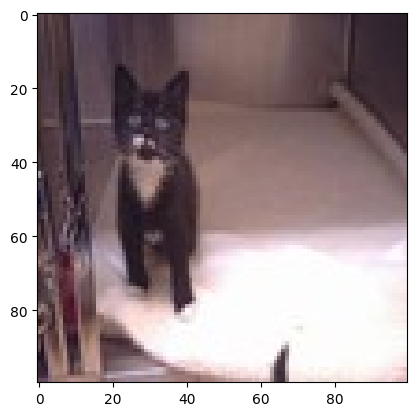

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
our model says it is a : dog


In [ ]:
save_model(model, 'my_model.keras')
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()


y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'

print("our model says it is a :", pred)